<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Smart Supply Chain </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         February 2023, Paris | © Saeed VARASTEH
    </span>
</div>

### Part 01 : Time Series Analysis

In this lecture we will see a set of operations we can perform on our time series in order to get some insights or transform the series to make forecasting easier.

---

### Import data and modules

#### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

C:\Users\paolo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\paolo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\paolo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Import data

In [2]:
df = pd.read_csv('./data/international-airline-passengers.csv',header=None)
df.columns = ['year','passengers']
print(df.shape)
df.head(5)

(144, 2)


,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
df.dtypes

year          object
passengers     int64
dtype: object

### Data preprocessing and visualization

#### Convert year column to datetime

In [5]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m')

In [6]:
df.head(5)

,year,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


#### Set year as index

In [7]:
df.set_index('year', inplace=True, drop=True)
df.head(5)

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Check for null values

In [8]:
df.isnull().sum()

passengers    0
dtype: int64

#### Visualize the data

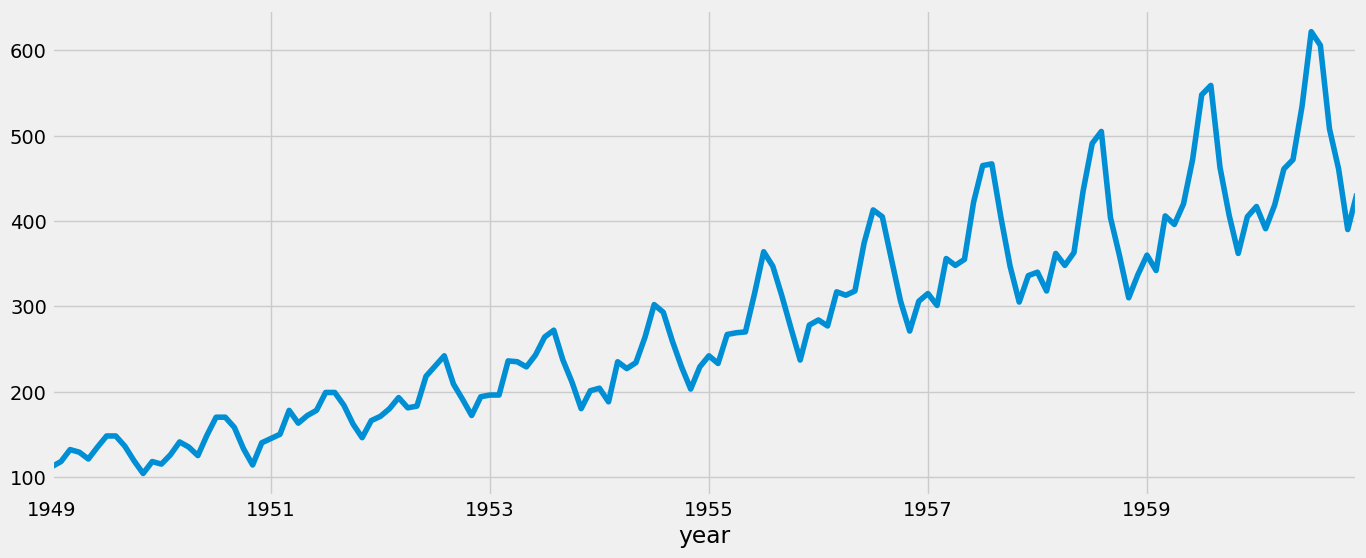

In [9]:
fig = plt.figure(figsize=(15, 6))
df["passengers"].plot(kind="line");

---

### Time series decomposition

One of the most common analysis for time series is decomposing it into multiple parts. The parts we can divide a time series into are: __trend__, __seasonality__ and __noise__.

This 3 parts can combine either additively or multiplicatively into the time series.

##### <span style="color:gray;"> Additive Model </span>
<center> y(t) = Trend + Seasonality + Noise </center>

Additives models are linear. Trend is linear and seasonality has constant frequency and amplitude. Change is constant over time.

##### <span style="color:gray;"> Multiplicative model </span>
<center> y(t) = Trend * Seasonality * Noise </center>

Multiplicatives models are nonlinear,trend is curved and seasonality is not constant. Change is not constant over time.


<div class="alert-warning">
Most time series are a combination of a additive model and a multiplicate model, is hard to identify real world time series into one single model. 
</div>

#### Automatic time series decomposition

Decomposing is used to analyse the time series. Identify each one of the different parts of the time series and its behaviour, each of the components may affect your models in different ways. 

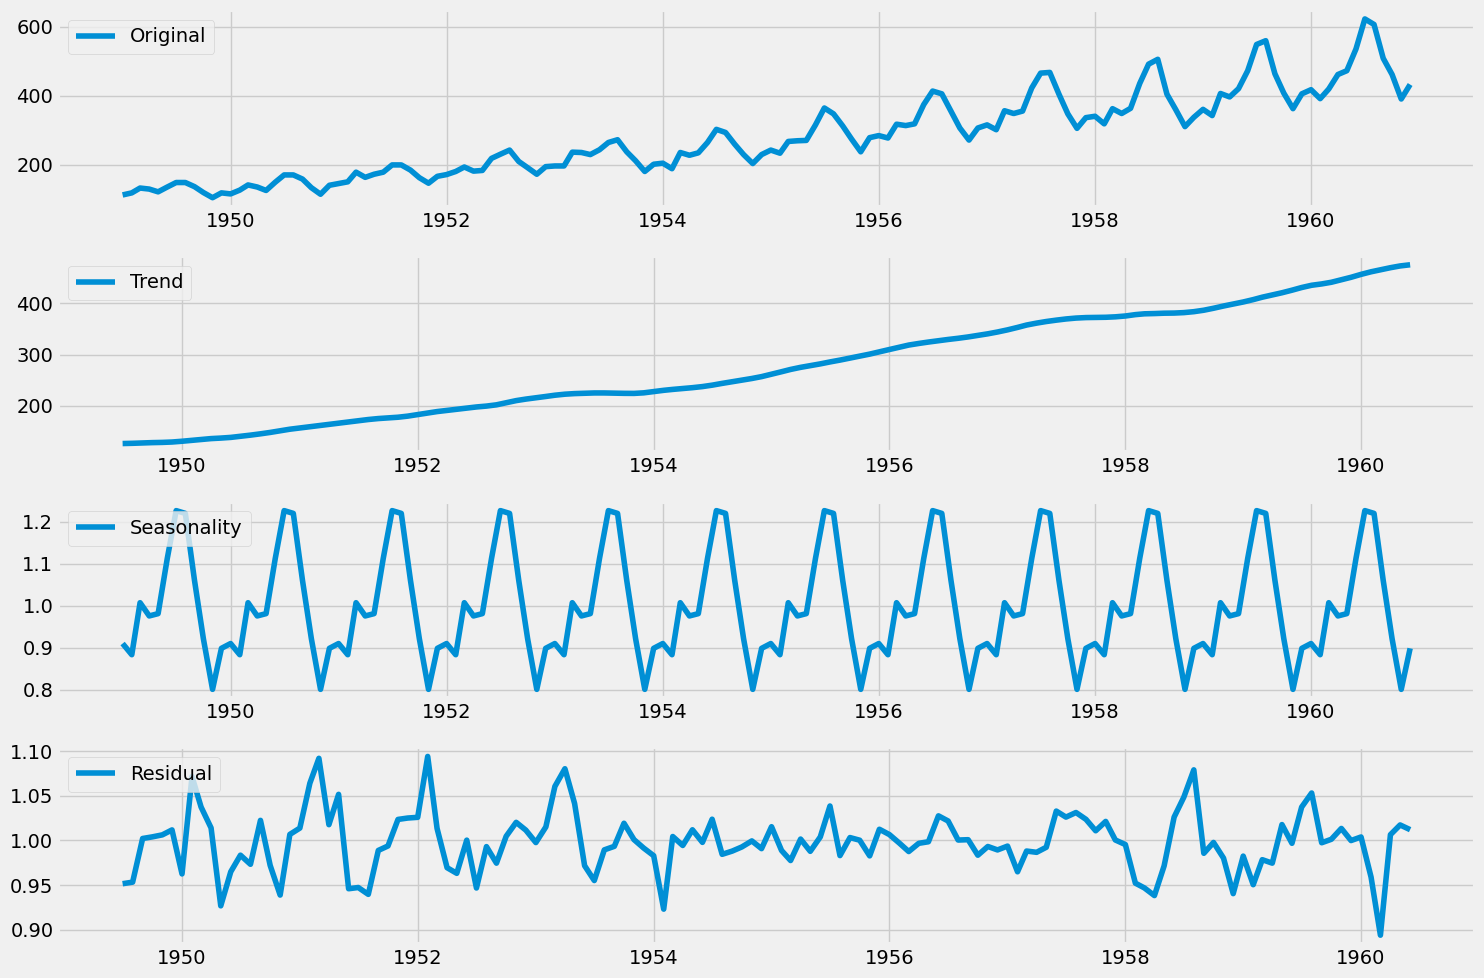

In [10]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4,1, figsize=(15,10))

axes[0].plot(df, label='Original')
axes[0].legend(loc='upper left');
axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');
axes[2].plot(seasonal, label='Seasonality')
axes[2].legend(loc='upper left');
axes[3].plot(residual, label='Residual')
axes[3].legend(loc='upper left');

plt.tight_layout()

##### <span style="color:gray;"> Trend </span>

A trend is observed when there is an increasing or decreasing slope observed in the time series

#### Moving average to detect trends

Smoothing is taking rolling averages over windows of time. In other words, __we take the average of ‘k’ consecutive values__ depending on the frequency of time series. 

Here we can take the average over the past 1 year, i.e. last 12 values.

In [11]:
df_ma = df.rolling(12).mean()

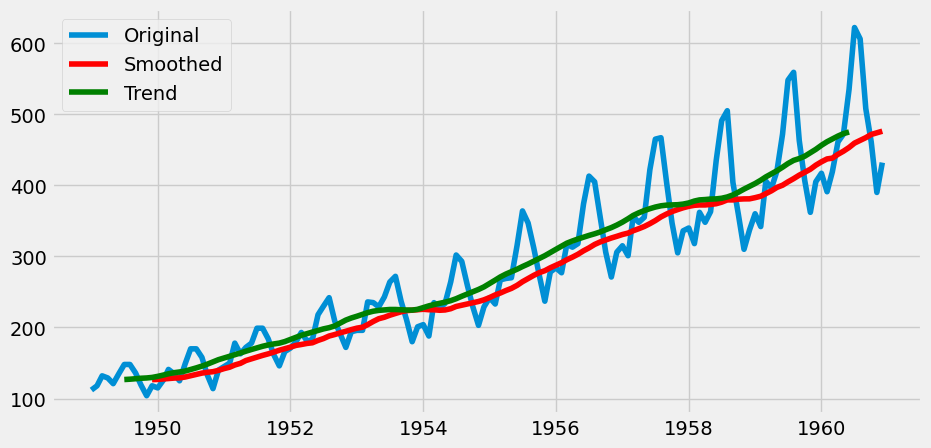

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
plt.plot(df, label="Original")
plt.plot(df_ma, label="Smoothed", color="Red")
plt.plot(trend, label="Trend", color="Green")
plt.legend();

##### <span style="color:gray;"> Seasonality </span>

Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.

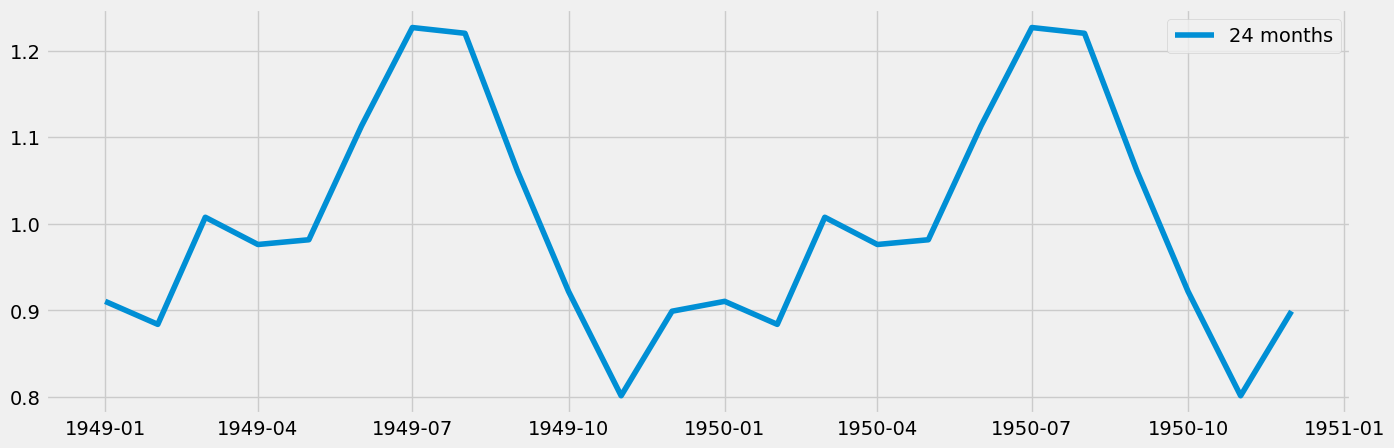

In [13]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.plot(seasonal[:24], label="24 months");
plt.legend();

<div class="alert-warning">
For real datasets their seasonalities will never be perfect but a combination of multiples. You should always expect this.
</div>

##### <span style="color:gray;"> Noise </span>

Our time series will also have a noise component to them, most likely __white noise__. 

We say __white noise__ is present if the measurement are independent and identically distributed with a mean of zero. This will mean all our measurements have same variance and no correlation with the rest of values in the series. 

---

### Check for sationarity

__Stationarity__ is an important characteristic of time series. A time series is stationarity if it has __constant mean and variance__ over time. Most statistical models work only with stationary data as this makes it easier to model. __Not all time series are stationary but we can transform them into stationary series in different ways.__

Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).

#### Dickey-Fuller test

In [14]:
from statsmodels.tsa.stattools import adfuller
# H0 : the time series is not stationary
# p_val : 99
print("pvalue of the test: ", adfuller(df)[1])

pvalue of the test:  0.9918802434376408


#### Autocorrelation and Partial autocorrelation plots

Autocorelation plots show how correlated are values at time t with the previous values in time t-1,t-2,..t-n. 

In non-stationary series the autocorrelation values will be highly correlated with distant points in time showing possible seasonalities or trends.

In stationary series autocorrelation values will quickly decrease over time t. This shows us that no information is carried over time and then the series should be constant over time.

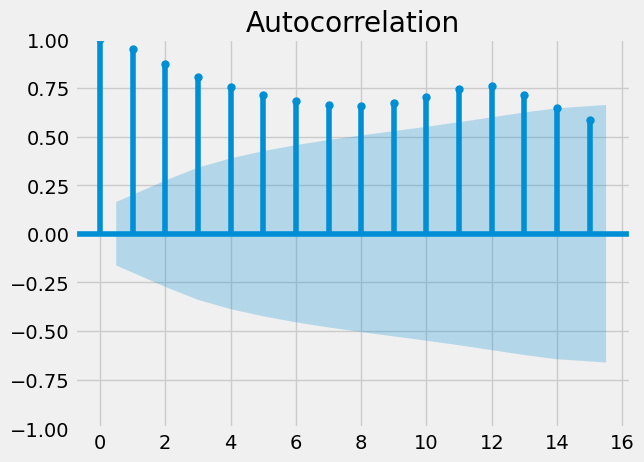

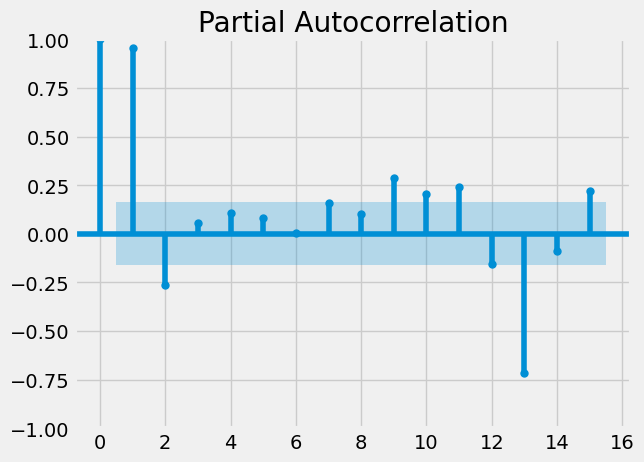

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df, lags = 15)
plot_pacf(df, lags = 15)
plt.show()

#### Rolling means and standard deviation of our series

We were talking about how our mean and standard deviation should be constant over time in order to have a stationary time series, why not just plot this two properties?

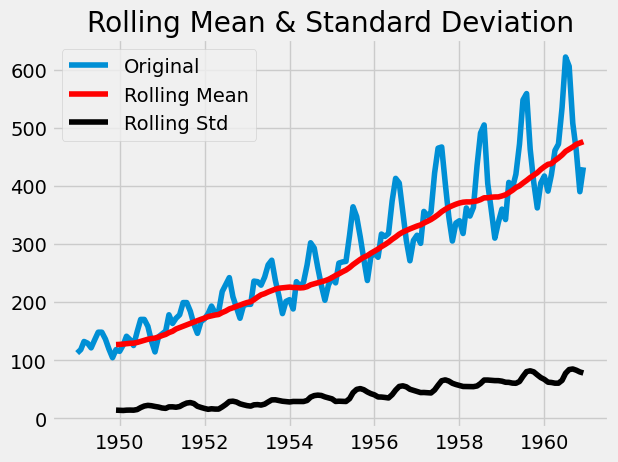

In [16]:
#Determing rolling statistics
rolmean = df.passengers.rolling(window=12).mean()
rolstd = df.passengers.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(df.passengers,label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

We can see how our mean and standar deviation are changing over the years.

---

### Making time series stationary

#### Difference transform to remove trend (mean shifts)

Applying a difference transform to a time series could help remove the series dependence on time.

This transform is done by substracting the previous obesvation to the current one.

In [17]:
df.head()

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
df.shift(1).head()

,passengers
year,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0


In [19]:
df_lag_1 = df - df.shift(1) 
df_lag_1.head(5)

,passengers
year,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


Taking the difference between consecutive observations would be a lag-1 difference, we can tweek this lag value to fit our series.

In [20]:
df_lag_3 = df - df.shift(3)
df_lag_3.head(5)

,passengers
year,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,17.0
1949-05-01,3.0


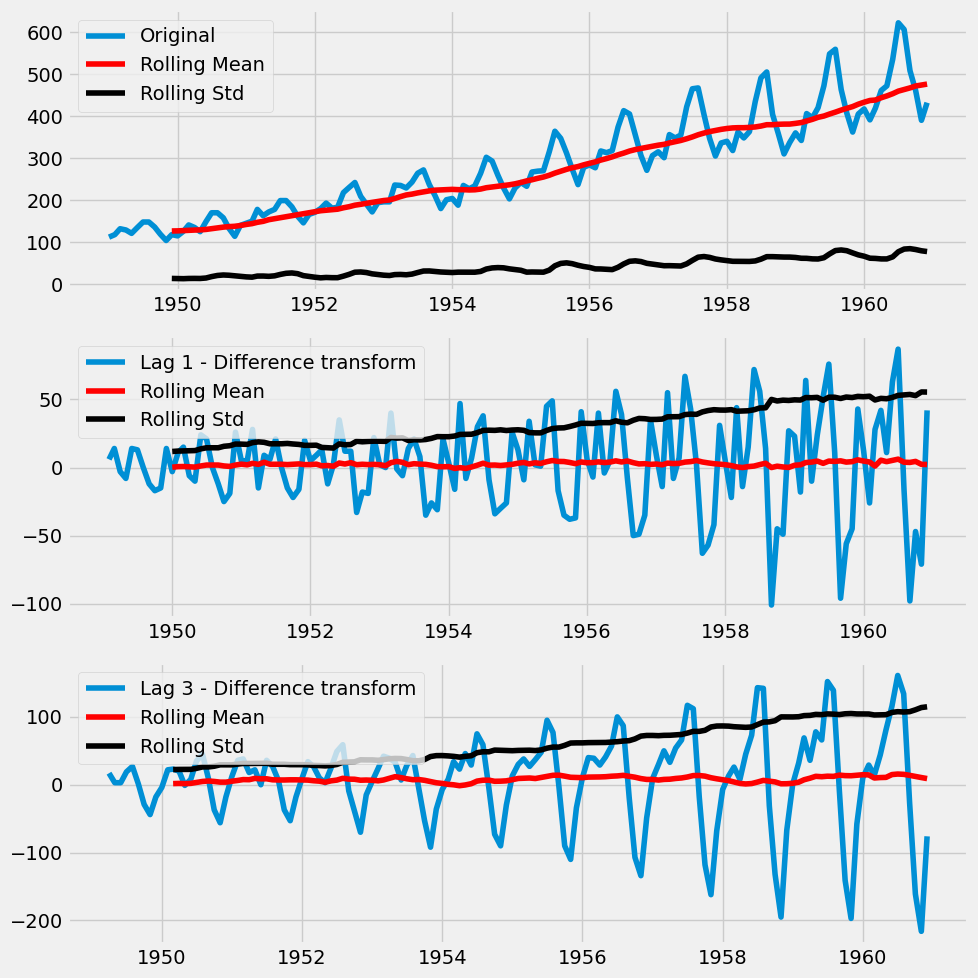

In [21]:
fig, axes = plt.subplots(3,1, figsize=(10,10))

axes[0].plot(df, label='Original')
axes[0].plot(df.passengers.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[0].plot(df.passengers.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[0].legend(loc='upper left');

axes[1].plot(df_lag_1, label='Lag 1 - Difference transform')
axes[1].plot(df_lag_1.passengers.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[1].plot(df_lag_1.passengers.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[1].legend(loc='upper left');

axes[2].plot(df_lag_3, label='Lag 3 - Difference transform')
axes[2].plot(df_lag_3.passengers.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[2].plot(df_lag_3.passengers.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[2].legend(loc='upper left');

plt.tight_layout()

<div class="alert-warning">
We can also apply differencing transforms consecutively in the same series if the temporal effect has not been removed yet. This is called multiple order difference transform.
</div>

In [22]:
# Check 
print("pvalue of the test: ", adfuller(df_lag_1.dropna())[1])

pvalue of the test:  0.05421329028382621


#### Difference transform to remove seasonality


In [23]:
df_lag_12 = df - df.shift(12)

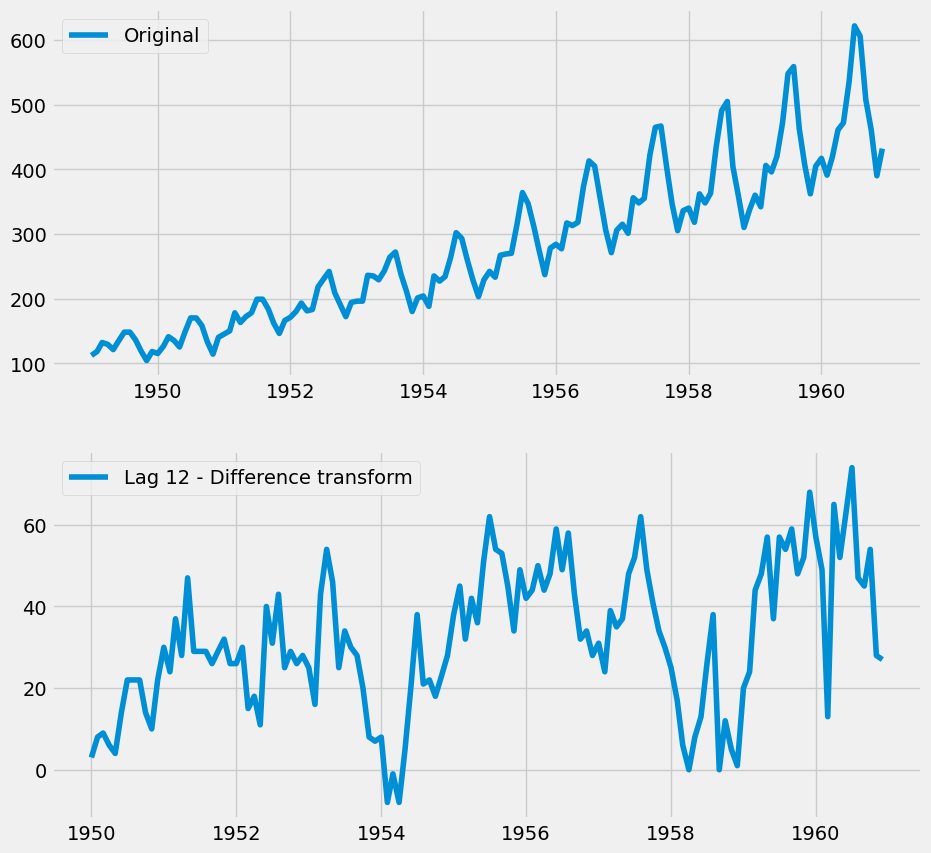

In [24]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].plot(df, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(df_lag_12, label='Lag 12 - Difference transform')
axes[1].legend(loc='upper left');

In [25]:
# Check 
print("pvalue of the test: ", adfuller(df_lag_12.dropna())[1])

pvalue of the test:  0.011551493085515008


#### Log transform to remove variance shifts 

Applying a log scale transform to a time series could also help remove the series dependence on time.


In [26]:
df_log = np.log(df)

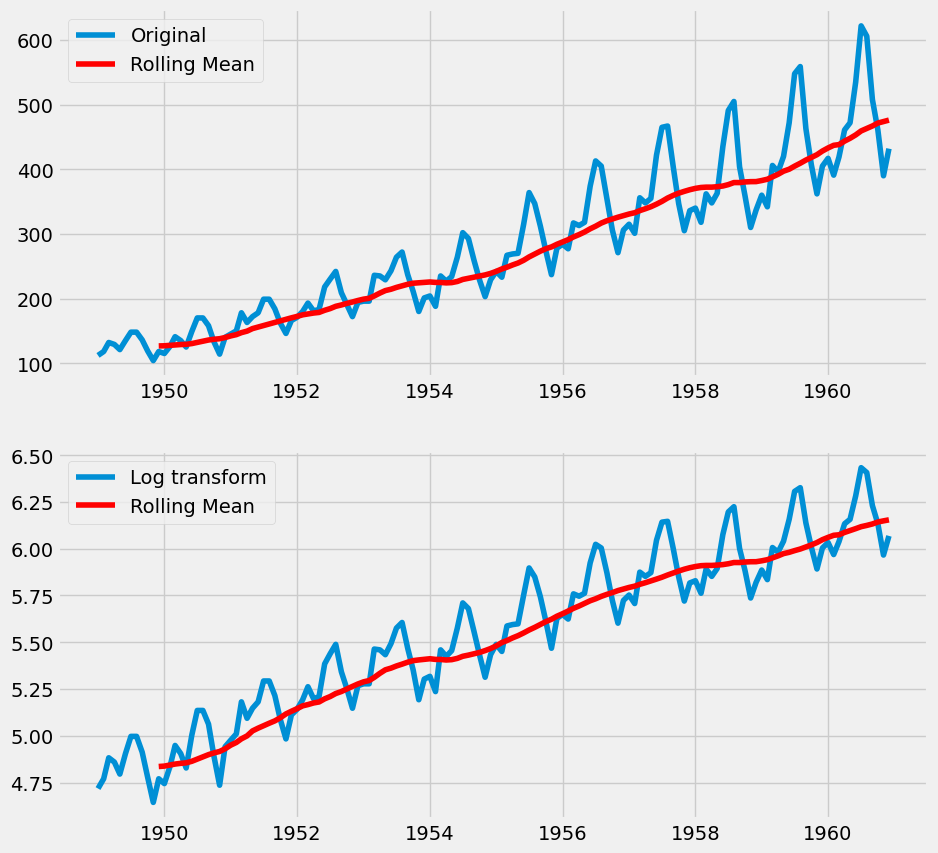

In [27]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].plot(df, label='Original')
axes[0].plot(df.passengers.rolling(window=12).mean(), color='red', label='Rolling Mean')
#axes[0].plot(df.passengers.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[0].legend(loc='upper left');

axes[1].plot(df_log, label='Log transform')
axes[1].plot(df_log.passengers.rolling(window=12).mean(), color='red', label='Rolling Mean')
#axes[1].plot(df_log.passengers.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[1].legend(loc='upper left');

#### Put them together

We can combine these methods to make a time series stationary.

In [28]:
df_log_lag_1 = df_log - df_log.shift(1) 

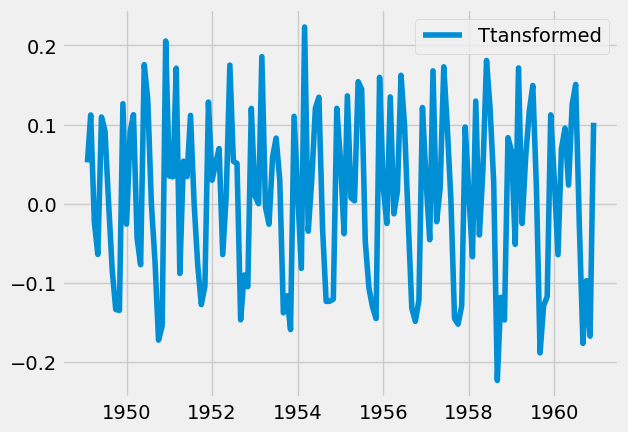

In [29]:
plt.plot(df_log_lag_1, label='Ttansformed')
plt.legend(loc='upper right');

In [30]:
# Check 
print("pvalue of the test: ", adfuller(df_log_lag_1.dropna())[1])

pvalue of the test:  0.07112054815085803


---

In [31]:
df_log_lag_12 = df_log - df_log.shift(12)

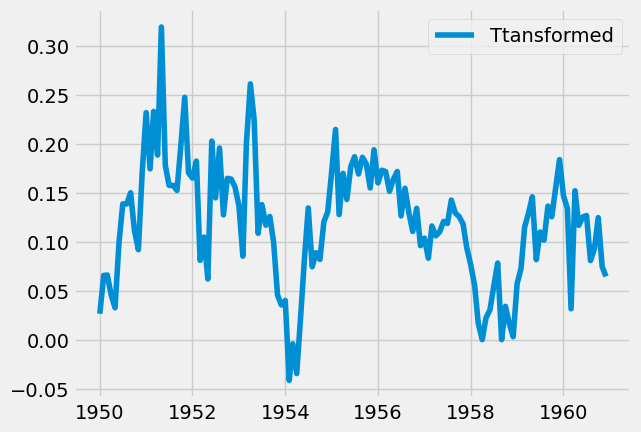

In [32]:
plt.plot(df_log_lag_12, label='Ttansformed')
plt.legend(loc='upper right');

In [33]:
# Check 
print("pvalue of the test: ", adfuller(df_log_lag_12.dropna())[1])

pvalue of the test:  0.07239567181769463


---

In [34]:
df_log_ma = df_log.rolling(window=12).mean()
df_log_shift = df_log - df_log_ma

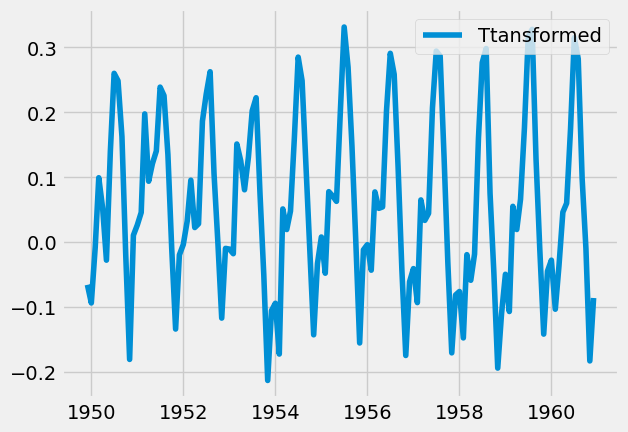

In [35]:
plt.plot(df_log_shift, label='Ttansformed')
plt.legend(loc='upper right');

In [36]:
# Check 
print("pvalue of the test: ", adfuller(df_log_shift.dropna())[1])

pvalue of the test:  0.022234630001243053


---